# Testing the model without a magnetic field

## setup

In [1]:
include("../src/ising.jl")
using CairoMakie

In [2]:
J=1.0
grid_size=8

8

## Temperature between 0K and 10K

In [3]:
energies, magnetisations, temps = temp_sweep(grid_size=grid_size,T_Start=0.0,T_End=10.0,J=J)

([-920.0, -1152.0, -1296.0, -1536.0, -1536.0, -1408.0, -1536.0, -1536.0, -1536.0, -1536.0  …  -184.0, -184.0, -216.0, -172.0, -136.0, -172.0, -120.0, -244.0, -164.0, -236.0], [-0.1015625, 0.0546875, 0.71875, -1.0, -1.0, -0.875, -1.0, -1.0, 1.0, -1.0  …  -0.02734375, -0.05859375, 0.07421875, -0.109375, -0.01171875, 0.0078125, 0.01171875, 0.00390625, 0.00390625, 0.15234375], [0.0, 0.10101010101010101, 0.20202020202020202, 0.30303030303030304, 0.40404040404040403, 0.5050505050505051, 0.6060606060606061, 0.7070707070707071, 0.8080808080808081, 0.9090909090909091  …  9.090909090909092, 9.191919191919192, 9.292929292929292, 9.393939393939394, 9.494949494949495, 9.595959595959595, 9.696969696969697, 9.797979797979798, 9.8989898989899, 10.0])

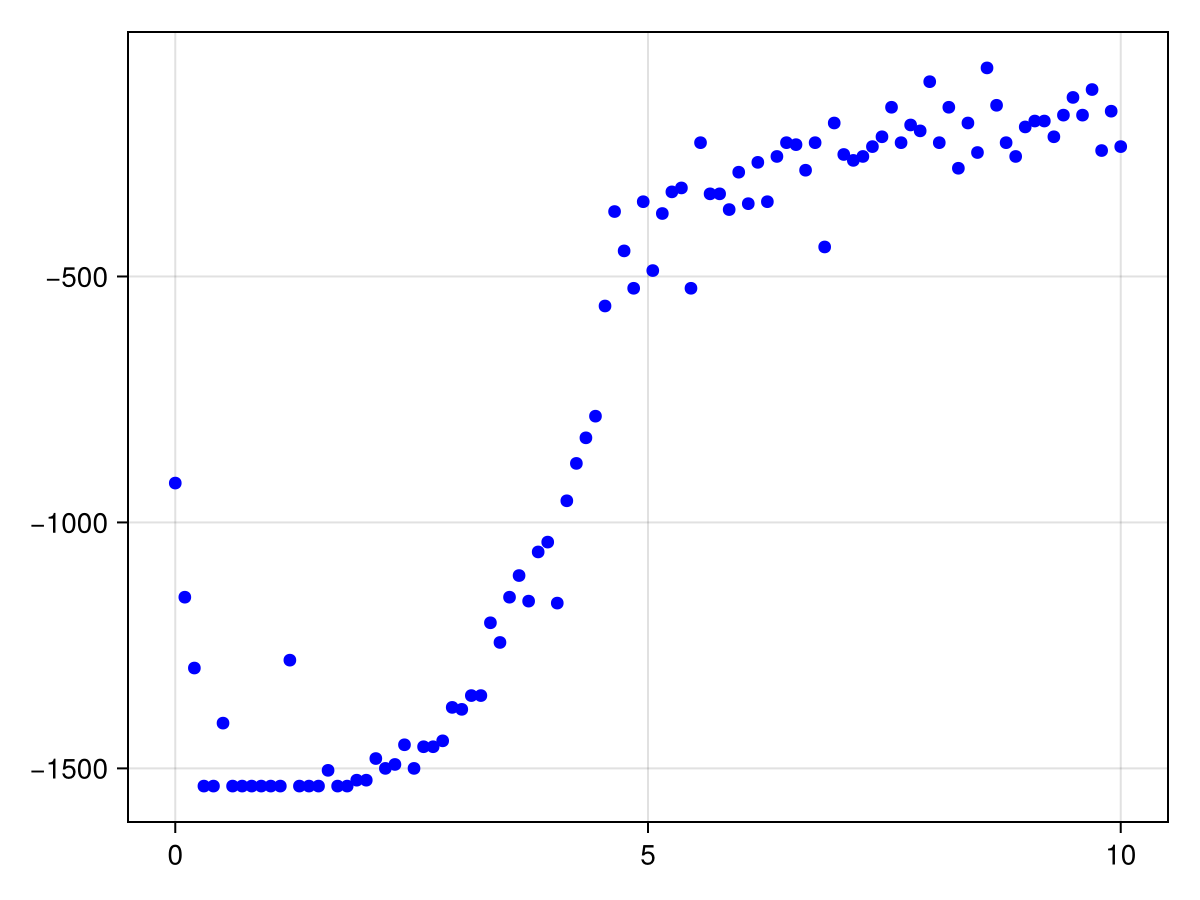

In [4]:
scatter(temps, energies, color=:blue, label="Energy")

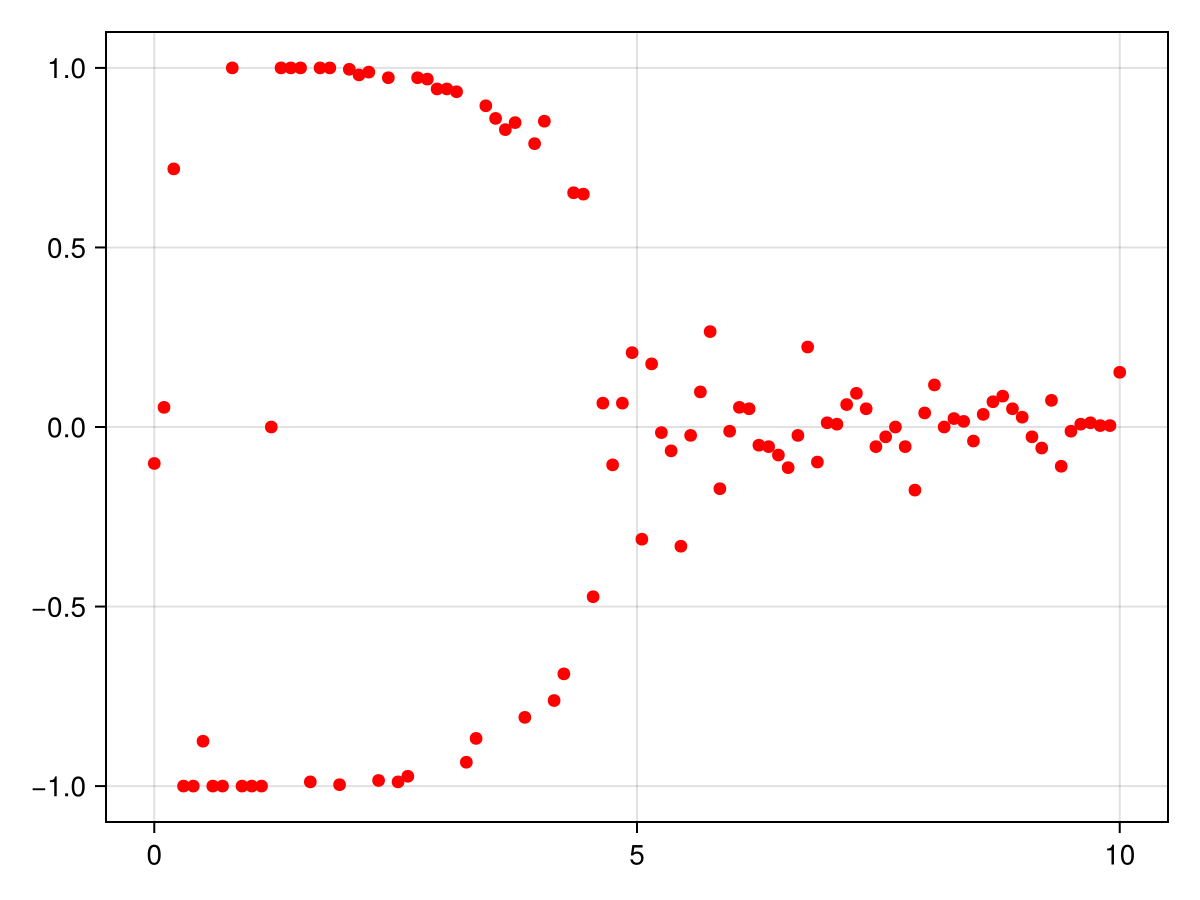

In [5]:
scatter(temps, magnetisations, color=:red, label="Magnetisation")

In [6]:
E_min = (-6*abs(J))*grid_size^3

-3072.0

In [7]:
weights = state_probability.(energies .- E_min, temps)
weights = weights ./ sum(weights);

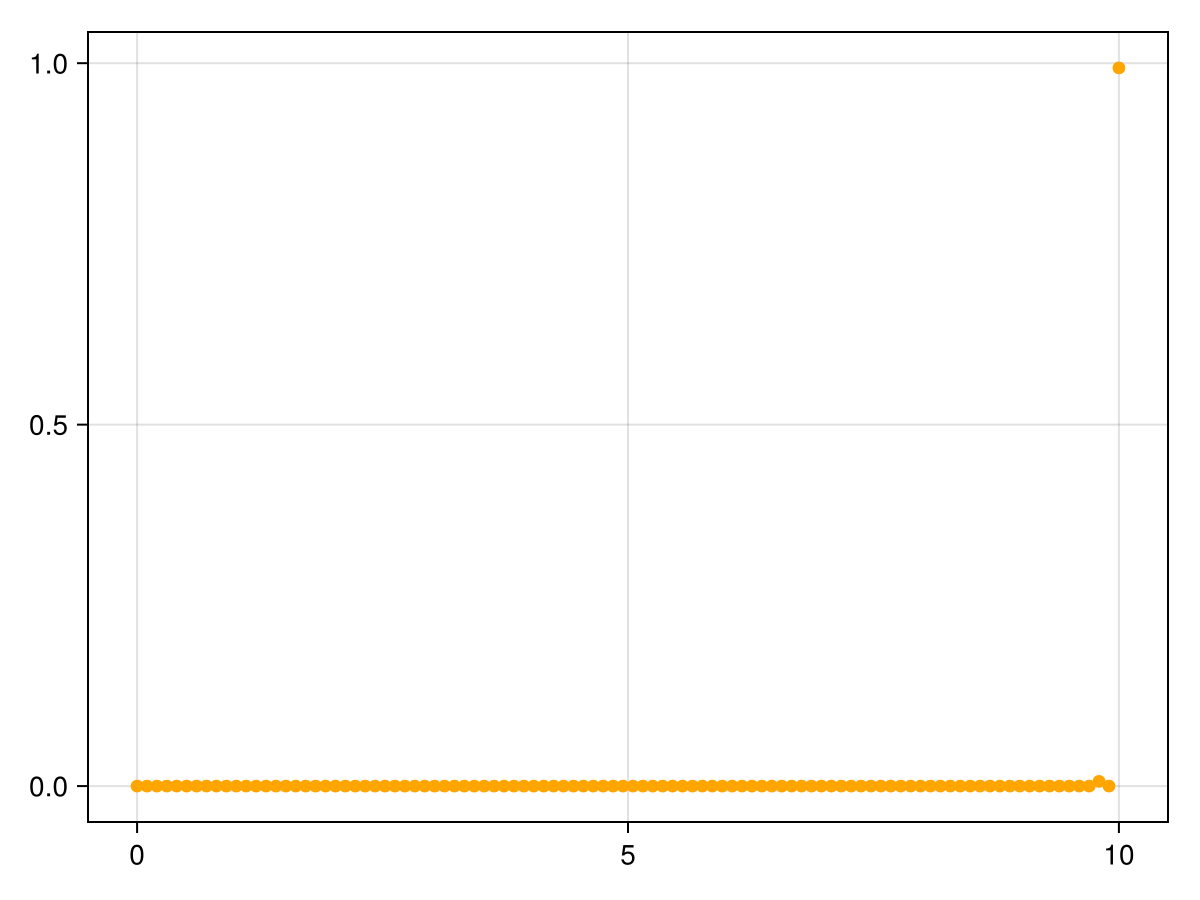

In [8]:
scatter(temps, weights, color=:orange, label="state_probability")

In [9]:
spec_heat_caps= Float64[]
for T in temps
    push!(spec_heat_caps, heat_capacity(energies,weights,T))
end

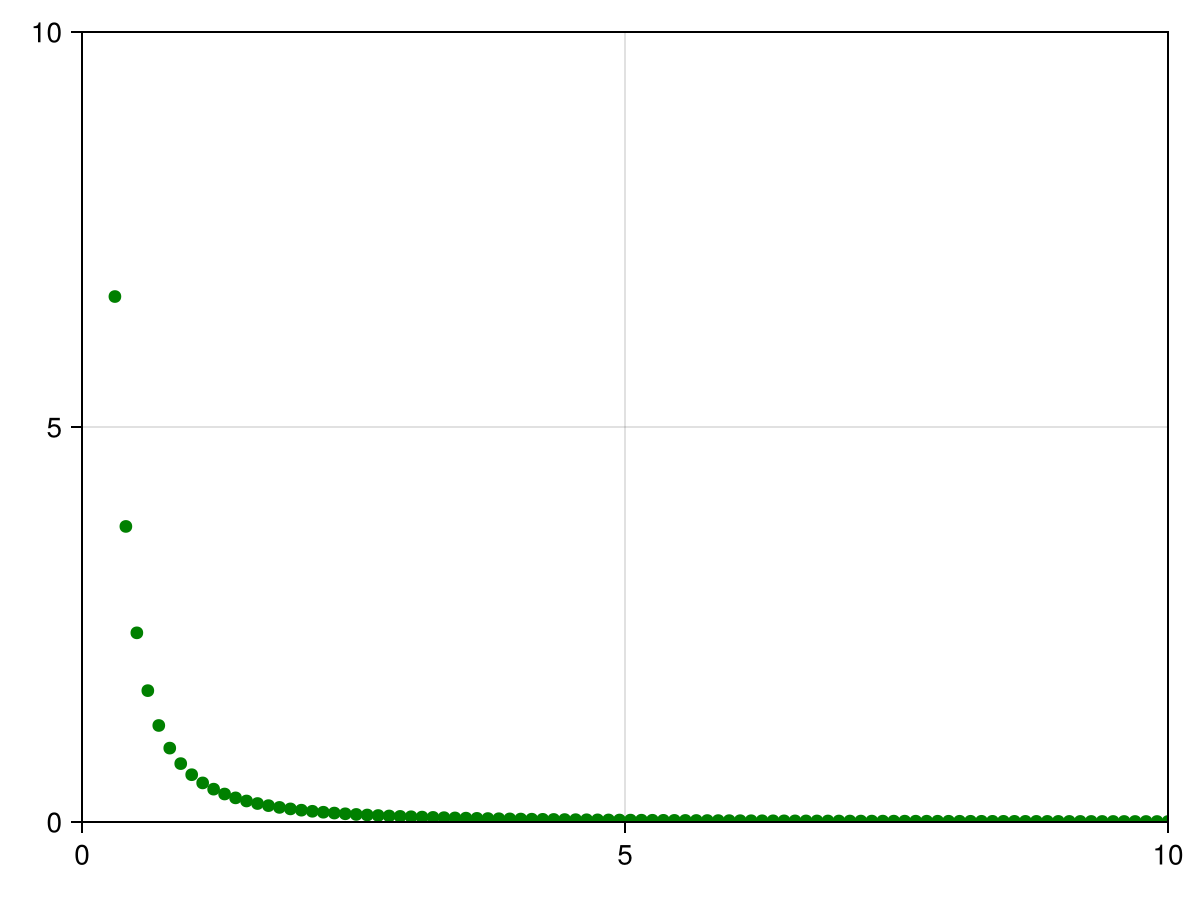

In [10]:
scatter(temps, spec_heat_caps, color=:green, label="Specific Heat Capacity")